In [1]:
#MongoDB and JSON data

import json
import pymongo
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = {}
if os.path.exists('games.json'):
  with open('games.json', 'r', encoding='utf-8') as fin:
    text = fin.read()
    if len(text) > 0:
      dataset = json.loads(text)
    
print(len(dataset))

97410


In [8]:
# Extract release dates and game names
release_dates = []
game_names = []
positive_scores = []
negative_scores = []
for app in dataset:
    game = dataset[app]
    release_dates.append(game['release_date'])
    game_names.append(game['name'])
    positive_scores.append(game['positive'])
    negative_scores.append(game['negative'])
    
# Create a DataFrame
data = {'Release Date': release_dates, 'Game Name': game_names,
        'positive': positive_scores, 'negative': negative_scores}
df = pd.DataFrame(data)



In [9]:
# Extract peak concurrent users
peak_ccu_list = [game['peak_ccu'] for game in dataset.values()]

# Calculate summary statistics
total_ccu = sum(peak_ccu_list)
average_ccu = sum(peak_ccu_list) / len(peak_ccu_list) if peak_ccu_list else 0
min_ccu = min(peak_ccu_list) if peak_ccu_list else 0
max_ccu = max(peak_ccu_list) if peak_ccu_list else 0

# Print the summary
print(f"Total Concurrent Players: {total_ccu}")
print(f"Average Concurrent Players: {average_ccu:.2f}")
print(f"Minimum Concurrent Players: {min_ccu}")
print(f"Maximum Concurrent Players: {max_ccu}")

Total Concurrent Players: 15851360
Average Concurrent Players: 162.73
Minimum Concurrent Players: 0
Maximum Concurrent Players: 1284268


In [10]:
# Game that has the most concurrent players
# Initialize variables to track the game with the max concurrent players
max_ccu = 0
max_ccu_game = None
for app in dataset:
    game = dataset[app]
    if game['peak_ccu'] > max_ccu:
        max_ccu = game['peak_ccu']
        max_ccu_game = game

print(max_ccu_game['name'])
print(max_ccu_game['peak_ccu'])

Palworld
1284268


In [12]:
# Extract positive and negative scores
for app in dataset:
    game = dataset[app]
    positive_scores.append(game['positive'])
    negative_scores.append(game['negative'])

# Calculate summary statistics for positive scores
total_positive = sum(positive_scores)
average_positive = sum(positive_scores) / len(positive_scores) if positive_scores else 0
min_positive = min(positive_scores) if positive_scores else 0
max_positive = max(positive_scores) if positive_scores else 0

# Calculate summary statistics for negative scores
total_negative = sum(negative_scores)
average_negative = sum(negative_scores) / len(negative_scores) if negative_scores else 0
min_negative = min(negative_scores) if negative_scores else 0
max_negative = max(negative_scores) if negative_scores else 0

# Print the summary
print(f"Positive Scores Summary:")
print(f"Total Positive Scores: {total_positive}")
print(f"Average Positive Score: {average_positive:.2f}")
print(f"Minimum Positive Score: {min_positive}")
print(f"Maximum Positive Score: {max_positive}")

print("\nNegative Scores Summary:")
print(f"Total Negative Scores: {total_negative}")
print(f"Average Negative Score: {average_negative:.2f}")
print(f"Minimum Negative Score: {min_negative}")
print(f"Maximum Negative Score: {max_negative}")

Positive Scores Summary:
Total Positive Scores: 165389834
Average Positive Score: 848.94
Minimum Positive Score: 0
Maximum Positive Score: 5764420

Negative Scores Summary:
Total Negative Scores: 27482476
Average Negative Score: 141.07
Minimum Negative Score: 0
Maximum Negative Score: 895978


In [13]:
# Initialize variables to track the games with the most positive and most negative scores
max_positive_score = 0
max_positive_game = None
max_negative_score = 0
max_negative_game = None

# Iterate through the dataset to find the games with the most positive and most negative scores
for app in dataset:
    game = dataset[app]
    if game['positive'] > max_positive_score:
        max_positive_score = game['positive']
        max_positive_game = game
    if game['negative'] > max_negative_score:
        max_negative_score = game['negative']
        max_negative_game = game
        
print(max_positive_game['name'])
print(max_positive_game['positive'])

print(max_negative_game['name'])
print(max_negative_game['negative'])

Counter-Strike: Global Offensive
5764420
PUBG: BATTLEGROUNDS
895978


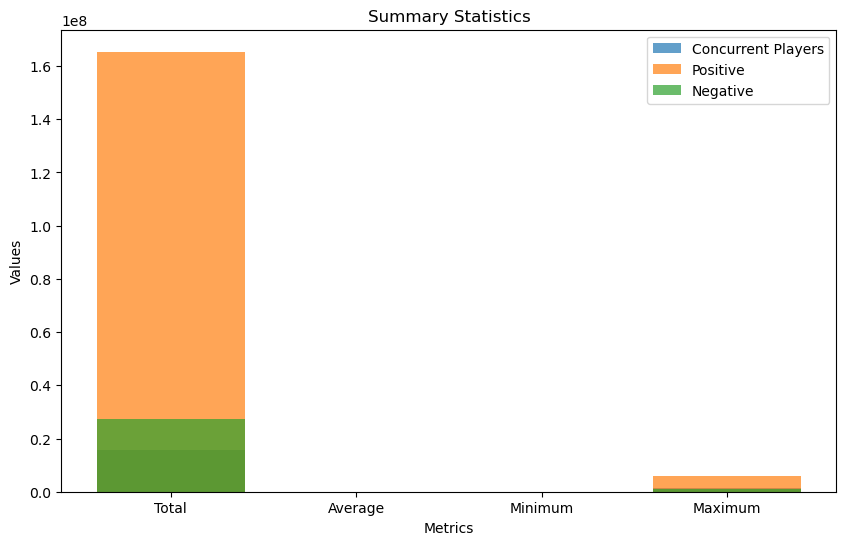

In [14]:
# Data for plotting
metrics = ['Total', 'Average', 'Minimum', 'Maximum']
concurrent_players = [total_ccu, average_ccu, min_ccu, max_ccu]
positive_scores = [total_positive, average_positive, min_positive, max_positive]
negative_scores = [total_negative, average_negative, min_negative, max_negative]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
ax.bar(metrics, concurrent_players, label='Concurrent Players', alpha=0.7)
ax.bar(metrics, positive_scores, label='Positive', alpha=0.7)
ax.bar(metrics, negative_scores, label='Negative', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Summary Statistics')
ax.legend()

# Display the plot
plt.show()